In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdtypes
from pyskim import skim

plt.rc('font', family='Malgun Gothic')

# 타이타닉에  탑승한 사람 자료 가져오기

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
,<int64>,<int64>,<object>,<float64>,<int64>,<int64>,<float64>,<object>,<category>,<object>,<bool>,<category>,<object>,<object>,<bool>
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


# 성별 생존자 수

In [18]:
who_df = (titanic_df
          .groupby(['who','survived'])
          .size()
          .reset_index(name='count')
          .assign(survived_name= lambda titanic_df: np.where(titanic_df['survived'] == 1 , '생존','사망'))
)
who_df

,who,survived,count,survived_name
,<object>,<int64>,<int64>,<object>
0,child,0,34,사망
1,child,1,49,생존
2,man,0,449,사망
3,man,1,88,생존
4,woman,0,66,사망
5,woman,1,205,생존


[Text(0, 0, '아이'), Text(1, 0, '남자'), Text(2, 0, '여자')]

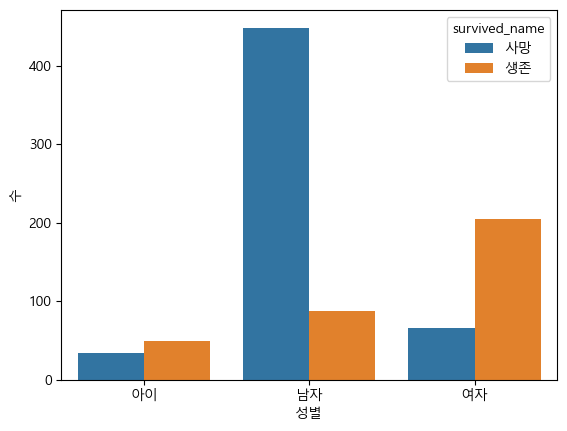

In [16]:
g= sns.barplot(who_df, x='who', y='count', hue='survived_name')
g.set(xlabel='성별', ylabel='수')
g.set_xticklabels(['아이','남자','여자'])